<a href="https://colab.research.google.com/github/sinjoo83/Python_practice/blob/main/Project_Life_expectancy_at_birth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

df=pd.read_csv("Life_expectancy_at_birth.csv")

In [42]:
df.head(2)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,Value,DateModified
0,WHOSIS_000001,Life expectancy at birth (years),AFR,Africa,LSO,Lesotho,Year,2019,True,Male,MLE,47.66,47.66,2020-12-04T00:00:00.000Z
1,WHOSIS_000001,Life expectancy at birth (years),AFR,Africa,CAF,Central African Republic,Year,2019,True,Male,MLE,50.21,50.21,2020-12-04T00:00:00.000Z


In [9]:
df.tail(2)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,Value,DateModified
2194,WHOSIS_000001,Life expectancy at birth (years),EUR,Europe,FRA,France,Year,2000,False,Female,FMLE,82.52,82.52,2020-12-04T00:00:00.000Z
2195,WHOSIS_000001,Life expectancy at birth (years),WPR,Western Pacific,JPN,Japan,Year,2000,False,Female,FMLE,84.37,84.37,2020-12-04T00:00:00.000Z


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        2196 non-null   object 
 1   Indicator            2196 non-null   object 
 2   ParentLocationCode   2196 non-null   object 
 3   ParentLocation       2196 non-null   object 
 4   SpatialDimValueCode  2196 non-null   object 
 5   Location             2196 non-null   object 
 6   Period type          2196 non-null   object 
 7   Period               2196 non-null   int64  
 8   IsLatestYear         2196 non-null   bool   
 9   Dim1                 2196 non-null   object 
 10  Dim1ValueCode        2196 non-null   object 
 11  FactValueNumeric     2196 non-null   float64
 12  Value                2196 non-null   float64
 13  DateModified         2196 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 225.3+ KB


In [12]:
df.isnull().sum()

IndicatorCode          0
Indicator              0
ParentLocationCode     0
ParentLocation         0
SpatialDimValueCode    0
Location               0
Period type            0
Period                 0
IsLatestYear           0
Sex                    0
Dim1ValueCode          0
FactValueNumeric       0
Value                  0
DateModified           0
dtype: int64

In [13]:
df=df.rename(columns={"ParentLocation":"Continent"})


In [11]:
df=df.rename(columns={"Dim1":"Sex"})

In [14]:
df.columns

Index(['IndicatorCode', 'Indicator', 'ParentLocationCode', 'Continent',
       'SpatialDimValueCode', 'Location', 'Period type', 'Period',
       'IsLatestYear', 'Sex', 'Dim1ValueCode', 'FactValueNumeric', 'Value',
       'DateModified'],
      dtype='object')

In [15]:
columns_to_keep=["Indicator","Continent","Period","Location","Sex","FactValueNumeric"]
columns_to_drop = set(df.columns) - set(columns_to_keep)
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Which continent has the longest life expectancy in 2019?
# (Average life expectancy by continent)

In [17]:
# To select 2019 data only
df_2019=df[df["Period"]==2019]

df_2019["Period"].count()

549

In [18]:
df_continent=df_2019.groupby("Continent", as_index=False)

In [19]:
df_continent.size()

,Continent,size
0,Africa,141
1,Americas,99
2,Eastern Mediterranean,63
3,Europe,150
4,South-East Asia,33
5,Western Pacific,63


In [20]:
df_continent=df_continent["FactValueNumeric"].mean()

In [21]:
df_continent=df_continent.sort_values(by=["FactValueNumeric"], ascending=False)

In [22]:
df_continent

,Continent,FactValueNumeric
3,Europe,78.236133
1,Americas,75.329596
4,South-East Asia,73.266061
5,Western Pacific,72.544286
2,Eastern Mediterranean,72.450476
0,Africa,64.457589


In [23]:
import plotly.express as px

In [24]:
fig = px.bar(df_continent, x='Continent', y='FactValueNumeric', title='Life expectancy by continent in 2019')
fig.show()

In [25]:
# Which country has the longest life expectancy in 2019?
# Where is UK?
# (Average life expectancy by country)

In [26]:
df_location=df_2019.groupby("Location", as_index=False)

In [27]:
df_location=df_location["FactValueNumeric"].mean()

In [28]:
df_location=df_location.sort_values(by=["FactValueNumeric"],ascending=False)

In [29]:
df_location_top_30=df_location[df_location["FactValueNumeric"]>80.7]

In [30]:
df_location_top_30

,Location,FactValueNumeric
83,Japan,84.230000
157,Switzerland,83.426667
145,Singapore,83.240000
131,Republic of Korea,83.236667
152,Spain,83.193333
41,Cyprus,83.126667
7,Australia,83.043333
81,Italy,82.926667
120,Norway,82.610000
80,Israel,82.590000


In [31]:
fig = px.bar(df_location_top_30, x='Location', y='FactValueNumeric', title='Life expectancy by continent in 2019-Top 30')
fig.show()

In [32]:
fig = px.scatter(df_location_top_30, x='Location', y='FactValueNumeric', size='FactValueNumeric',
                 title='Life expectancy by country in 2019-Top 30')

fig.update_layout(yaxis_title="Age", xaxis_title="Country")
fig.show()

In [ ]:
# World vs UK - Average life expectancy by sex in 2019

In [33]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [34]:
df_2019.columns

Index(['Indicator', 'Continent', 'Location', 'Period', 'Sex',
       'FactValueNumeric'],
      dtype='object')

In [35]:
df_2019

,Indicator,Continent,Location,Period,Sex,FactValueNumeric
0,Life expectancy at birth (years),Africa,Lesotho,2019,Male,47.66
1,Life expectancy at birth (years),Africa,Central African Republic,2019,Male,50.21
2,Life expectancy at birth (years),Africa,Lesotho,2019,Both sexes,50.75
3,Life expectancy at birth (years),Africa,Central African Republic,2019,Both sexes,53.10
4,Life expectancy at birth (years),Africa,Eswatini,2019,Male,53.36
...,...,...,...,...,...,...
544,Life expectancy at birth (years),Europe,Cyprus,2019,Female,85.12
545,Life expectancy at birth (years),Western Pacific,Singapore,2019,Female,85.45
546,Life expectancy at birth (years),Europe,Spain,2019,Female,85.68
547,Life expectancy at birth (years),Western Pacific,Republic of Korea,2019,Female,86.09


In [36]:
df_uk_only=df_2019[df_2019["Location"]=="United Kingdom of Great Britain and Northern Ireland"]

uk=df_uk_only['FactValueNumeric'].mean()
df_uk_male=df_uk_only[df_uk_only["Sex"]=="Male"]
df_uk_female=df_uk_only[df_uk_only["Sex"]=="Female"]
df_uk_both=df_uk_only[df_uk_only["Sex"]=="Both sexes"]

df_uk_male=float(df_uk_male["FactValueNumeric"])
df_uk_female=float(df_uk_female["FactValueNumeric"])
df_uk_both=float(df_uk_both["FactValueNumeric"])

data=[uk,df_uk_male,df_uk_female,df_uk_both]
uk_data=pd.DataFrame(data,index=["UK_total","UK_Male","UK_Female","UK_both"],columns=["Age"])
uk_data





,Age
UK_total,81.393333
UK_Male,79.790000
UK_Female,82.990000
UK_both,81.400000


In [37]:

world=df_2019['FactValueNumeric'].mean()
df_world_male=df_2019[df_2019["Sex"]=="Male"]
world_male=df_world_male["FactValueNumeric"].mean()

df_world_female=df_2019[df_2019["Sex"]=="Female"]
world_female=df_world_female["FactValueNumeric"].mean()

df_world_both=df_2019[df_2019["Sex"]=="Both sexes"]
world_both=df_world_both["FactValueNumeric"].mean()



data=[world,world_male,world_female,world_both]
world_data=pd.DataFrame(data, index=["World_total","World_Male","World_Female","World_both"],columns=["Age"])
world_data

,Age
World_total,72.557413
World_Male,70.134590
World_Female,74.997158
World_both,72.540492


In [54]:
uk= {
    "Location": ["UK_total","UK_Male", "UK_Female","UK_both"],
    "Age":[81.393333,79.790000,82.990000,81.400000]
}

uk_df = pd.DataFrame(uk)

uk_df

,Location,Age
0,UK_total,81.393333
1,UK_Male,79.790000
2,UK_Female,82.990000
3,UK_both,81.400000


In [55]:
world= {
    "Location": ["World_total","World_Male", "World_Female","World_both"],
    "Age":[72.557413,70.134590,74.997158,72.540492]
}

world_df = pd.DataFrame(world)

world_df



,Location,Age
0,World_total,72.557413
1,World_Male,70.134590
2,World_Female,74.997158
3,World_both,72.540492


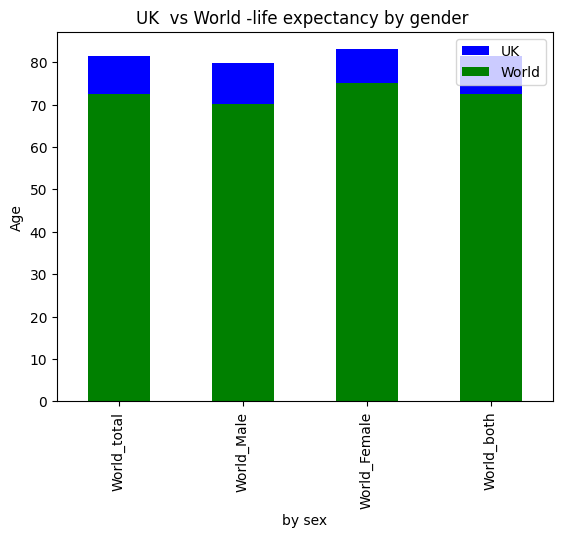

In [60]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a single set of axes
fig, ax = plt.subplots()

# Plot Y1 from DataFrame 1 on the axes
uk_df.plot(x='Location', y='Age', kind='bar',color='blue', ax=ax, label='UK')

# Plot Y2 from DataFrame 2 on the same axes
world_df.plot(x='Location', y='Age', kind='bar',color='green', ax=ax, label='World')

# Set plot title and labels
ax.set_title('UK  vs World -life expectancy by gender ')
ax.set_xlabel('by sex')
ax.set_ylabel('Age')

# Show the legend to differentiate the DataFrames
ax.legend()

# Show the plot
plt.show()